In [3]:
from impedance import preprocessing
import numpy as np

# Load data from the example EIS data
frequencies, Z = preprocessing.readCSV('./YSZ_Si_T290ohm_C01_3c.csv')


#Change the sign of the imaginary part
Z  = Z.real - 1j * Z.imag  # This flips the sign of the imaginary part

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

For this dataset which simply contains impedance data in three columns (frequency, Z_real, Z_imag)

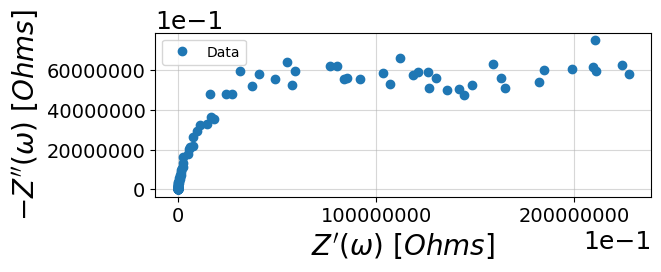

In [4]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)

plt.legend(['Data'])
plt.show()

In [5]:
# Filter the DataFrame up to Z_real < 3000000000
#Z = Z[Z.real < 30_000_000]

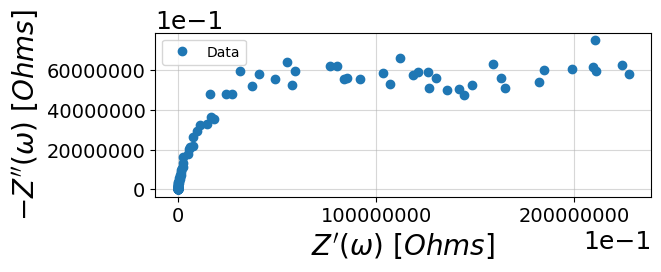

In [6]:
fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)

plt.legend(['Data'])
plt.show()

In [52]:
from impedance.models.circuits import CustomCircuit

# https://impedancepy.readthedocs.io/en/latest/circuit-elements.html

circuit = 'p(R1,C1)-p(R1,C1)'
initial_guess = [10000000, 1e-7,10000000, 1e-9]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

In [53]:
circuit.fit(frequencies, Z)

In [54]:
Z_fit = circuit.predict(frequencies)

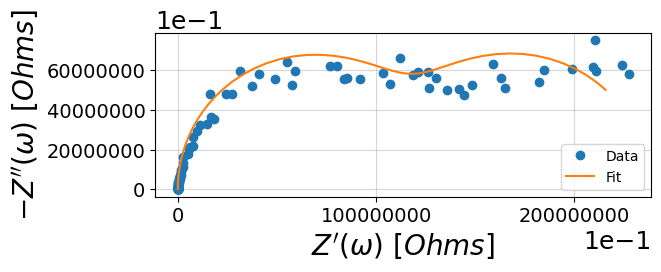

In [55]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()

## Vizualize

In [56]:
circuit.fit(frequencies, Z)

print(circuit)


Circuit string: p(R1,C1)-p(R1,C1)
Fit: True

Initial guesses:
     R1 = 1.00e+07 [Ohm]
     C1 = 1.00e-07 [F]
     R1 = 1.00e+07 [Ohm]
     C1 = 1.00e-09 [F]

Fit parameters:
     R1 = 1.20e+07  (+/- 1.66e-24) [Ohm]
     C1 = 1.12e-07  (+/- 2.56e-09) [F]
     R1 = 1.18e+07  (+/- 5.81e-23) [Ohm]
     C1 = 7.77e-09  (+/- 2.86e-10) [F]



In [57]:
import warnings
warnings.filterwarnings("ignore")

circuit.plot(f_data=frequencies, Z_data=Z)

alt.HConcatChart(...)

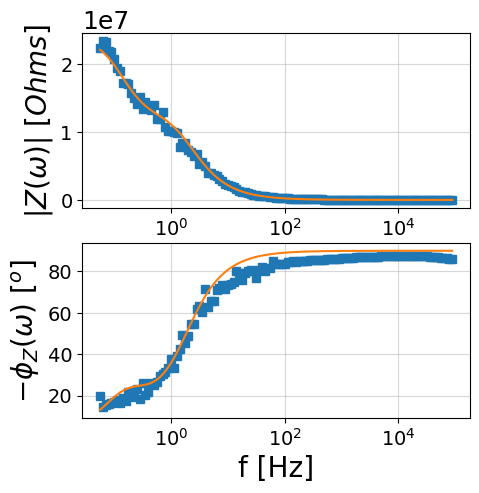

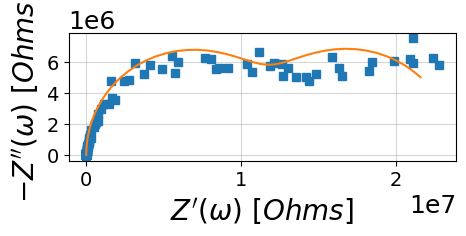

In [58]:
n = 'nyquist'
b = 'bode'

circuit.plot(f_data=frequencies, Z_data=Z, kind=b)    #Bode
circuit.plot(f_data=frequencies, Z_data=Z, kind=n)    
plt.show()